In [1]:
from keras.utils import pad_sequences
from keras.datasets import imdb
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Embedding, GlobalAveragePooling1D
from tensorflow.python.keras.callbacks import LambdaCallback
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
( x_train, y_train), ( x_test,y_test) = imdb.load_data(num_words=10000)
class_names = ['Negative','Positive']
wi = imdb.get_word_index()
print(wi['hey'])

1397


In [3]:
reverse_word_index = dict((value,key) for key,value in wi.items())
def decode(review):
    text = ''
    for i in review:
        text+=reverse_word_index[i]
        text += ' '
    return text
decode(x_train[2])

"the as there in at by br of sure many br of proving no only women was than doesn't as you never of hat night that with ignored they bad out superman plays of how star so stories film comes defense date of wide they don't do that had with of hollywood br of my seeing fan this of pop out body shots in having because cause it's stick passing first were enjoys for from look seven sense from me and die in character as cuban issues but is you that isn't one song just is him less are strongly not are you that different just even by this of you there is eight when it part are film's love film's 80's was big also light don't and as it in character looked cinematography so stories is far br man acting "

In [4]:
x_train = pad_sequences(x_train,value=wi['the'],padding = 'post',maxlen=256)
x_test = pad_sequences(x_test,value=wi['the'],padding = 'post',maxlen=256)
decode(x_train[2])

"the as there in at by br of sure many br of proving no only women was than doesn't as you never of hat night that with ignored they bad out superman plays of how star so stories film comes defense date of wide they don't do that had with of hollywood br of my seeing fan this of pop out body shots in having because cause it's stick passing first were enjoys for from look seven sense from me and die in character as cuban issues but is you that isn't one song just is him less are strongly not are you that different just even by this of you there is eight when it part are film's love film's 80's was big also light don't and as it in character looked cinematography so stories is far br man acting the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the th

In [5]:
model = Sequential(
[
    Embedding(10000,16),
    GlobalAveragePooling1D(),
    Dense(16,activation='relu'),
    Dense(1,activation='sigmoid')
    
])
model.compile(
   loss ='binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [6]:

sl = LambdaCallback(on_epoch_end = lambda e, l:print(e,end='.'))
E = 20
h = model.fit(
    x_train, y_train, 
    validation_split= 0.2,
    epochs = E, 
    callbacks = [sl],
    verbose = False
     
)


0.1.2.3.4.5.6.7.8.9.10.11.12.13.14.15.16.17.18.19.

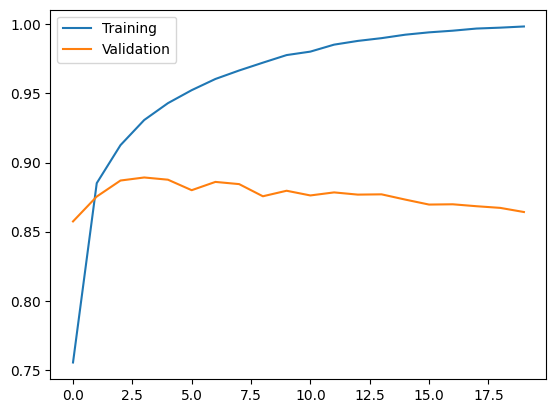

In [9]:
plt.plot(range(E),h.history['accuracy'],label='Training')
plt.plot(range(E),h.history['val_accuracy'],label = 'Validation')
plt.legend()
plt.show()

In [10]:
loss,acc = model.evaluate(x_test,y_test)
print(acc*100)
p = model.predict(np.expand_dims(x_test[2],axis=0))
print(class_names[np.argmax(p[0])])
print(decode(x_test[2]))

782/782 [==============================] - 0s 537us/step - loss: 0.8605 - accuracy: 0.8434
84.34000015258789
Negative
even cliche to purchased is money easily egypt and glory any is and i i liam film as and set actually easily like outdated sequel any of and ryan made film is and br and constant and of 90s letting deep in act made of road in of and movie and rural vhs of share in reaching fact of and polly spinal of 90s to them book are is unfamiliar mercy and mode they funniest is white courage and vegas wooden br of gender and unfortunately of 1968 no of years hokey and true up and and but 3 all ordinary be oblivious to and were deserve film clone and of creative br comes their kung who is assuming bias out new all it incomprehensible it episode much that's including i i cartoon of my certain no as rooting over you with way to cartoon of enough for that with way who is finished and they of rukh br for and expressing stunts black that story at actual in can as movie is and has though 